#### Compare datasets of irrigated crop yield and Kayrokum lake volume and Geoid height
#### Build regression models using train and test datasets
#### Predict internal market price for 1 kg of rice

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

In [84]:
df_vol = pd.read_csv('Kayrokum_volume.csv')

In [85]:
df_vol['Start_time'] = pd.to_datetime(df_vol['Start_time'])
df_vol['Month'] = df_vol['Start_time'].apply(lambda x: x.month)
df_vol['Year']=df_vol['Start_time'].apply(lambda x: x.year)
df_vol['Week']=df_vol['Start_time'].apply(lambda x: x.week)
df_vol['Day']=df_vol['Start_time'].apply(lambda x: x.day)
df_vol['Day_of_Y']=df_vol['Start_time'].apply(lambda x: x.dayofyear)

In [86]:
df_vol.head()

,Start_time,Value,Unit,Month,Year,Week,Day,Day_of_Y
0,2008-07-21 03:24:00,1.514,10^6 m^3,7,2008,30,21,203
1,2008-07-31 01:23:00,1.346,10^6 m^3,7,2008,31,31,213
2,2008-08-19 21:20:00,1.013,10^6 m^3,8,2008,34,19,232
3,2008-08-09 17:17:00,0.898,10^6 m^3,8,2008,32,9,222
4,2008-09-28 13:14:00,0.832,10^6 m^3,9,2008,39,28,272


In [87]:
pd.to_datetime(df_vol['Start_time']).iloc[1].dayofyear

213

We'll write a function to return week number within single month based on the day. This will be used to analyse measurement' distibution within each month.

In [35]:
def week_of_month(day):
    if day >= 1 and day <=7:
        return 1
    elif day > 7 and day <=14:
        return 2
    elif day > 14 and day <=21:
        return 3
    else:
        return 4

Applying the function to create a column with week numbers

In [88]:
df_vol['Mweek'] = df_vol['Day'].apply(week_of_month)

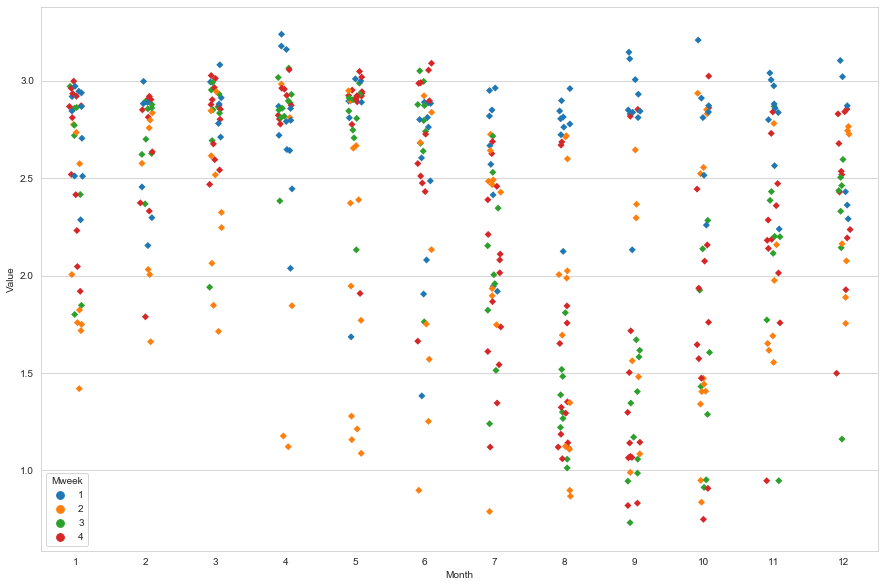

In [89]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Month', y='Value', hue='Mweek', data=df_vol, marker="D")

Number of datapoints for wk 1 is 101 


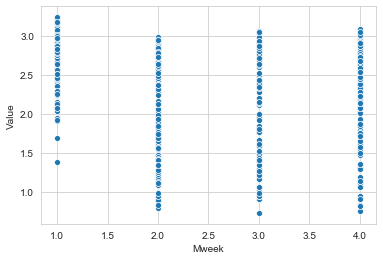

In [72]:
sns.scatterplot(x='Mweek', y='Value',data=df_vol)
print("Number of datapoints for wk 1 is %d " % df_vol[df_vol['Mweek']==1]['Mweek'].count())

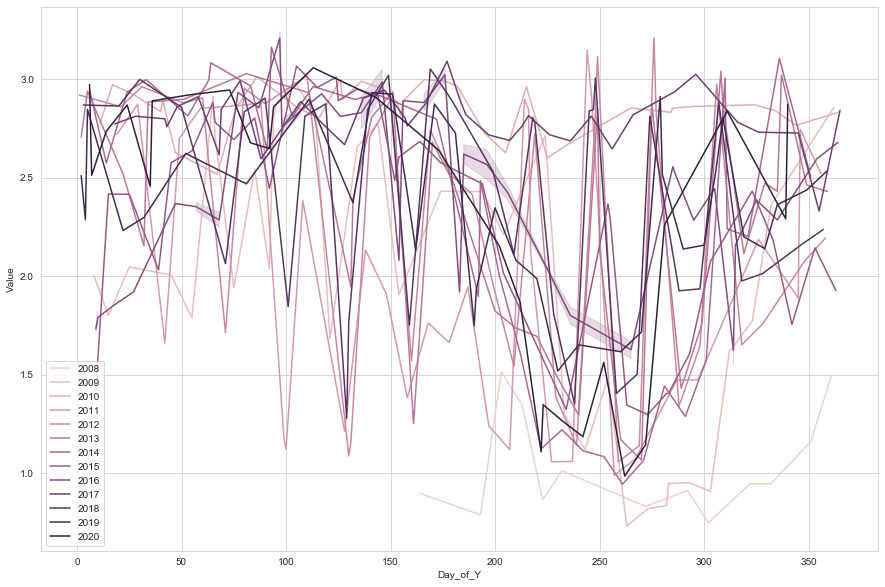

In [92]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Day_of_Y', y='Value', hue='Year', data=df_vol)

x=np.array(df_gh_gr['Year'].unique())
legnd=selection_sort(x)

plt.legend(legnd)

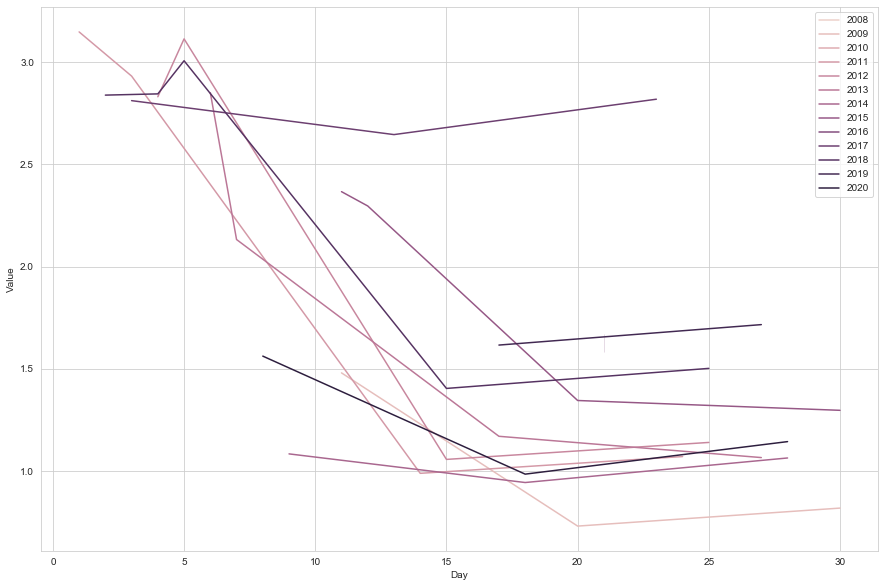

In [91]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Day', y='Value', hue='Year', data=df_vol[df_vol['Month']==9])

x=np.array(df_gh_gr['Year'].unique())
legnd=selection_sort(x)

plt.legend(legnd)

In [6]:
print(months)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [10]:
stats.mode(df_vol[df_vol['Month']==3]['Value'])

StatisticsError: no unique mode; found 35 equally common values


 What part of month falls on modes in bimodal distributions?


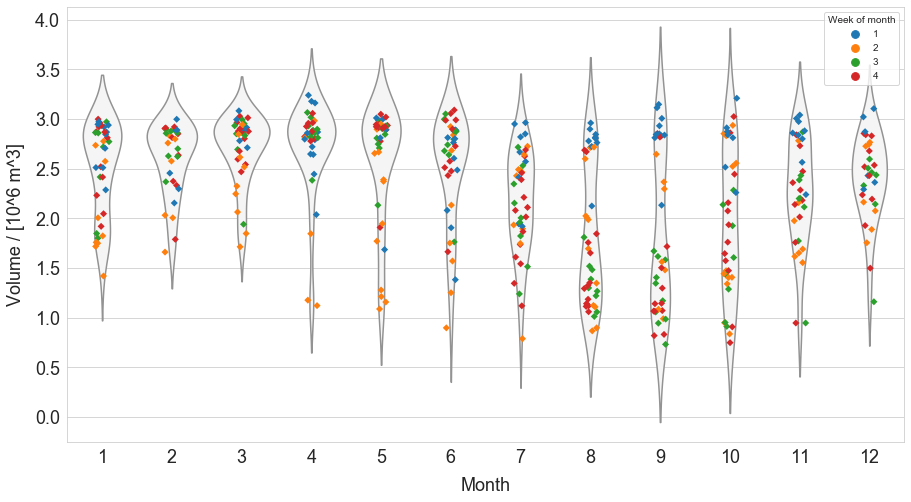

In [97]:
#Violin plot of lake volume distribution grouped by month
plt.figure(figsize=(15,8))

sns.set_style("whitegrid")

sns.violinplot(x='Month', y='Value', data=df_vol, color='whitesmoke', inner=None)
#sns.swarmplot(x='Month', y='Value', data=df_vol)
sns.stripplot(x='Month', y='Value', hue='Mweek', data=df_vol, marker="D")
unit = df_vol['Unit'][0]

plt.xlabel('Month', fontsize=18, labelpad=10)
plt.ylabel('Volume / [%s]' % unit, fontsize=18, labelpad=10)

plt.legend(title="Week of month")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

print("\n What part of month falls on modes in bimodal distributions?")

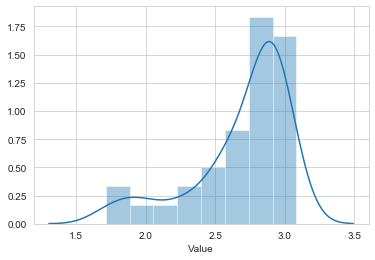

In [17]:
sns.distplot(df_vol[df_vol['Month']==3]['Value'], bins=8)


 How months distributed over the measurements dataset? 
 How years 2010 and 2017 correlate with crop yield?


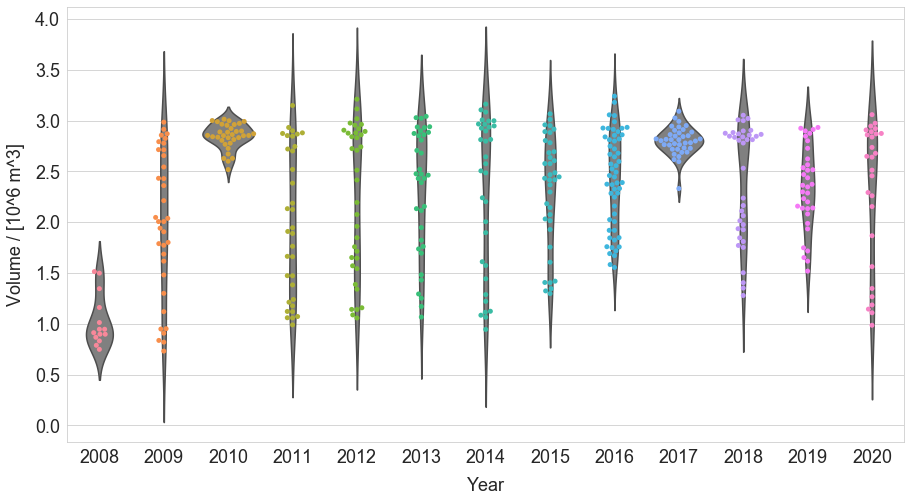

In [103]:
# Violin plot of lake volume per each year
plt.figure(figsize=(15,8))

sns.set_style("whitegrid")

sns.violinplot(x='Year', y='Value', data=df_vol, color='gray', inner=None)
sns.swarmplot(x='Year', y='Value', data=df_vol)
unit = df_vol['Unit'][0]

plt.xlabel('Year', fontsize=18, labelpad=10)
plt.ylabel('Volume / [%s]' % unit, fontsize=18, labelpad=10)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

print("\n How months distributed over the measurements dataset? \n How years 2010 and 2017 correlate with crop yield?")

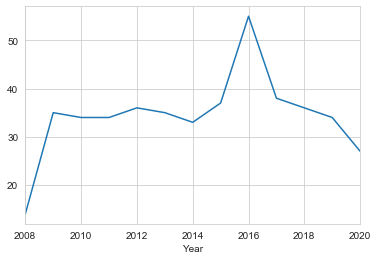

In [10]:
# Number of recorded observations per year
df_vol.groupby('Year')['Value'].count().plot()

### Adding Kayrokum lake Geoid height

In [51]:
df_geoh = pd.read_csv('Kayrokum_max_geoid_height.csv')

In [100]:
# Getting month and year from the measurement timestamp
df_geoh['Start time'] = pd.to_datetime(df_geoh['Start time'])
df_geoh['Month'] = df_geoh['Start time'].apply(lambda x: x.month)
df_geoh['Year'] = df_geoh['Start time'].apply(lambda x: x.year)
df_geoh['Week']=df_geoh['Start time'].apply(lambda x: x.week)
df_geoh['Day']=df_geoh['Start time'].apply(lambda x: x.day)
df_geoh['Day_of_Y']=df_geoh['Start time'].apply(lambda x: x.dayofyear)

df_geoh['Mweek'] = df_geoh['Day'].apply(week_of_month)

(array([340., 342., 344., 346., 348., 350., 352.]),
 <a list of 7 Text yticklabel objects>)

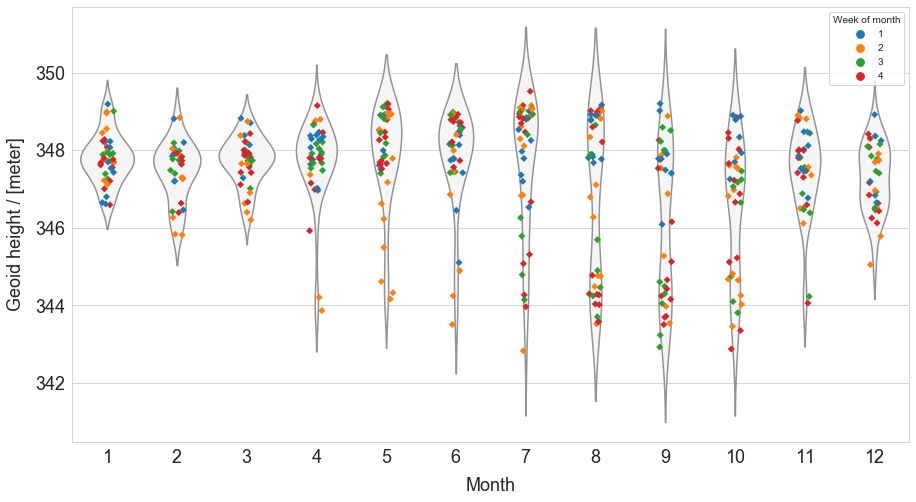

In [123]:
#Violin plot of lake geoid height distribution grouped by month
plt.figure(figsize=(15,8))

sns.set_style("whitegrid")

sns.violinplot(x='Month', y='Value', data=df_geoh, color='whitesmoke', inner=None)
sns.stripplot(x='Month', y='Value', hue='Mweek', data=df_geoh, marker="D")
unit = df_geoh['Unit'][0]

plt.xlabel('Month', fontsize=18, labelpad=10)
plt.ylabel('Geoid height / [%s]' % unit, fontsize=18, labelpad=10)

plt.legend(title="Week of month")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


(array([340., 342., 344., 346., 348., 350., 352.]),
 <a list of 7 Text yticklabel objects>)

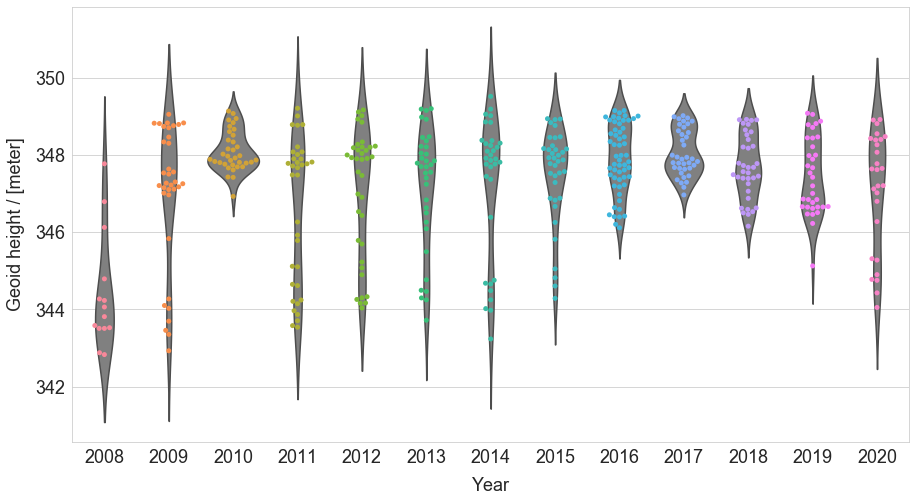

In [14]:
#Violin plot of lake geoid heught distribution grouped by year
plt.figure(figsize=(15,8))

sns.set_style("whitegrid")

sns.violinplot(x='Year', y='Value', data=df_geoh, color='gray', inner=None)
sns.swarmplot(x='Year', y='Value', data=df_geoh)
unit = df_geoh['Unit'][0]

plt.xlabel('Year', fontsize=18, labelpad=10)
plt.ylabel('Geoid height / [%s]' % unit, fontsize=18, labelpad=10)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

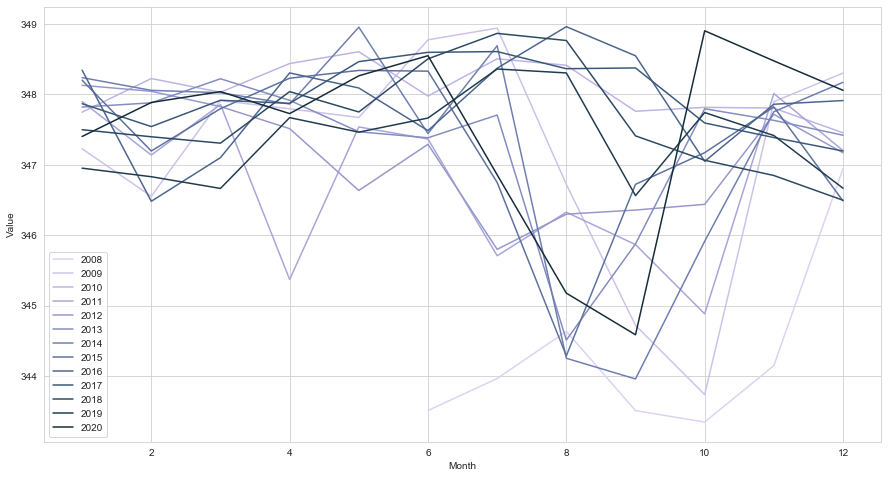

In [53]:
plt.figure(figsize=(15,8))
df_gh_gr = df_geoh.groupby(['Month', 'Year']).mean()
df_gh_gr.reset_index(inplace=True)
sns.lineplot(y='Value', x='Month', data=df_gh_gr, hue='Year', palette="ch:2.5,.25")

# Pairwise sorting function
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x=np.array(df_gh_gr['Year'].unique())
legnd=selection_sort(x)

plt.legend(legnd)

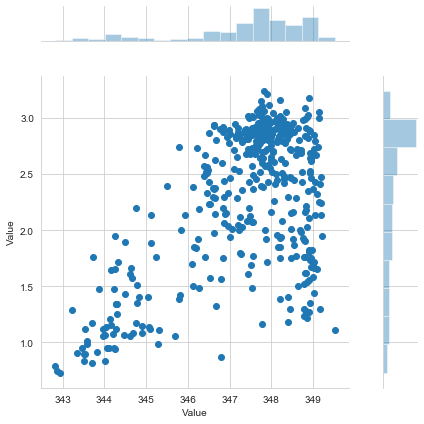

In [66]:
# Scatter plot with distribution height vs volume
sns.jointplot(x=df_geoh['Value'][:-4], y=df_vol['Value'], kind='scatter', space=1)

In [71]:
df_gh_gr=df_geoh.groupby(['Month', 'Year']).mean()
df_gh_gr.reset_index(inplace=True)
df_gh_gr

,Month,Year,Value
0,1,2009,347.226333
1,1,2010,347.746000
2,1,2011,347.896000
3,1,2012,348.128000
4,1,2013,347.819000
...,...,...,...
146,12,2016,347.911500
147,12,2017,347.194667
148,12,2018,346.495500
149,12,2019,346.666000


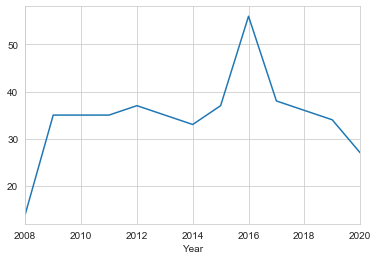

In [58]:
# Number of recorded observations of height per year
df_geoh.groupby('Year')['Value'].count().plot()

In [22]:
# How to find missing observations from the volume dataset?

C:\Users\kachk\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\kachk\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


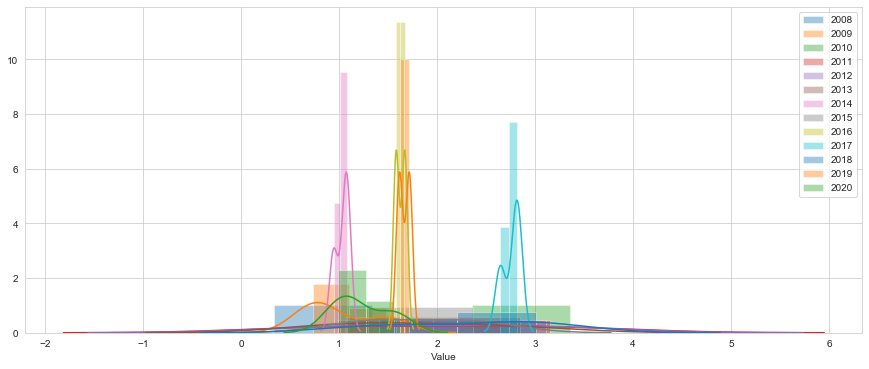

In [59]:
# Ploting lake volume for September per year
plt.figure(figsize=(15,6))
report_month = 9

for i in df_vol['Year'].unique():
    sns.distplot(df_vol[(df_vol['Month']==report_month) & (df_vol['Year']==i)]['Value'])

plt.legend(df_vol['Year'].unique())

In [24]:
df_vol.groupby(['Month', 'Year']).count()

Start time  Value  Unit
Month Year                         
1     2009           3      3     3
      2010           3      3     3
      2011           2      2     2
      2012           3      3     3
      2013           3      3     3
...                ...    ...   ...
12    2016           2      2     2
      2017           3      3     3
      2018           2      2     2
      2019           3      3     3
      2020           1      1     1

[144 rows x 3 columns]

In [25]:
df_geoh.groupby('Month').count()

,Start time,Value,Type,Unit,Year
Month,,,,,
1,37,37,37,37,37
2,31,31,31,31,31
3,36,36,36,36,36
4,37,37,37,37,37
5,39,39,39,39,39
6,38,38,38,38,38
7,40,40,40,40,40
8,39,39,39,39,39
9,36,36,36,36,36


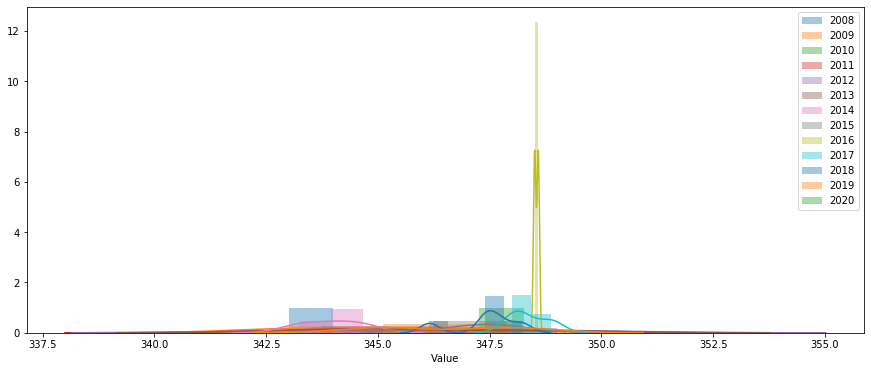

In [37]:
# Ploting lake geoid height for September per year
plt.figure(figsize=(15,6))
report_month = 9

for i in df_geoh['Year'].unique():
    sns.distplot(df_geoh[(df_geoh['Month']==report_month) & (df_geoh['Year']==i)]['Value'])

plt.legend(df_geoh['Year'].unique())

In [38]:
# Modeling volume as cube of height in m^3
df_geoh['Height^3']=df_geoh['Value'].apply(lambda x: x**3/1000000)

In [39]:
df_geoh.head()

,Start time,Value,Type,Unit,Month,Year,Height^3
0,2008-07-21 03:24:00,344.790,Geoid height,meter,7,2008,40.988685
1,2008-07-31 01:23:00,344.270,Geoid height,meter,7,2008,40.803511
2,2008-08-19 21:20:00,343.582,Geoid height,meter,8,2008,40.559371
3,2008-08-09 17:17:00,343.525,Geoid height,meter,8,2008,40.539188
4,2008-09-28 13:14:00,343.507,Geoid height,meter,9,2008,40.532816


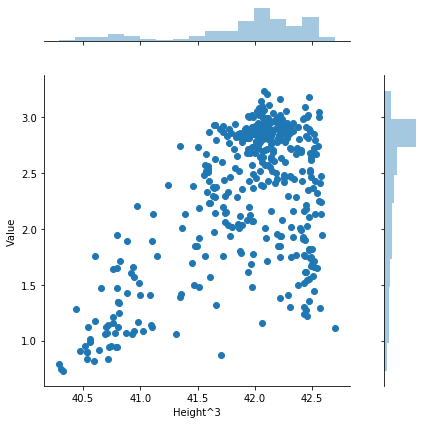

In [40]:
# Scatter plot with distribution height^3 vs volume
sns.jointplot(x=df_geoh['Height^3'][:-4], y=df_vol['Value'], kind='scatter', space=1)

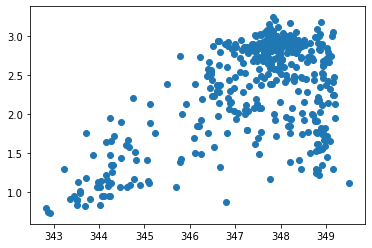

In [41]:
plt.scatter(x=df_geoh['Value'][:-4], y=df_vol['Value'])

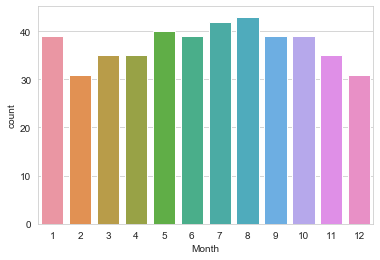

In [105]:
# Number of observations per month
sns.countplot(x='Month', data=df_vol)

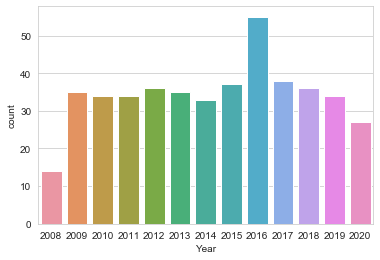

In [104]:
# Number of observations per year
sns.countplot(x='Year', data=df_vol)

### Domain knowledge comment
Assuming that lowest possible volume is the minimum water level in the lake.
There are three possible conditions:
1. Volume doesn't change between two measurements. This means that flow rate in equals flow rate out. This will be considered as zero usage for irrigation. Water just flows through the lake and leaves into Syr Darya.
2. Volume increases from one measurement to another. This means that water is accumulated in the lake. It can be realised either by closing the damb or by increasing the flow in the lake, e.g. during snow melting in the mountains.
3. Volume drops between two measurements. This is perceived as water used for irrigation. Cumulative sum can be named as yearly irrigation water usage. This value can be assessed for its correlation with yearly crop yield.

For consistency one can assume that outlet flow rate is always the same and water volume increase or decrease is acheved by increasing inlet flow rate and using water for irrigation, respectively

In [117]:
#Opening Excel file with crop yield results
df_cropy = pd.read_excel(open('Sogd_Crop_Pattern\Sogd_Province_cropYield_2018.xlsx','rb'))
# Adding column with year with corresponding value
df_cropy['Report Year'] = df_cropy.columns.values[0][40:44]
# Adding column Province with value
df_cropy['Province'] = df_cropy.columns.values[0][26:30]

#Get columns where most of the data are NaN values
nan_col = []
for i in range(len(df_cropy.columns)):
    if df_cropy.iloc[:,[i]].isnull().sum()[0]>3:
        nan_col.append(i)
        
#Dropping colunns where most data are NaN values
df_cropy.drop(df_cropy.iloc[:,nan_col].columns.values, axis=1, inplace=True)

#Renaming columns
new_colnames = [df_cropy.iloc[0,0], df_cropy.iloc[0,1],df_cropy.iloc[1,2],df_cropy.iloc[1,3], df_cropy.iloc[0,4], 'Report Year', 'Province']

#Changing column names
df_cropy.columns=new_colnames

# Add units columns
df_cropy['Area Units']='ha'
df_cropy['Yield Units']='t/ha'

#Drop useless rows
df_cropy.drop([0,1,2,14,15], axis=0, inplace=True)

In [118]:
df_cropy

,Site (district),Net irrigated area,Cotton,Wheat,Rice,Report Year,Province,Area Units,Yield Units
3,Isfara,6968.4,3.46,6.43,2.53,2018,Sogd,ha,t/ha
4,Jabbor Rasulov,8360.9,3.22,4.19,4.61,2018,Sogd,ha,t/ha
5,Asht,10566.7,2.19,7.14,2.78,2018,Sogd,ha,t/ha
6,Konibodom,15327.7,2.06,6.57,2.62,2018,Sogd,ha,t/ha
7,Zafarobod,17657.4,2.14,5.41,2.25,2018,Sogd,ha,t/ha
8,Spitamen,11237.5,2.62,4.82,4.76,2018,Sogd,ha,t/ha
9,B.Ghafurov,24025.1,2.13,4.84,3.82,2018,Sogd,ha,t/ha
10,Mastchoh,21248.5,1.97,2.09,3.85,2018,Sogd,ha,t/ha
11,Istaravshan,2907.5,1.23,0,0,2018,Sogd,ha,t/ha
12,Ghonchi,161.7,0,0,0,2018,Sogd,ha,t/ha


In [119]:
df_cropy_total=df_cropy_total.append(df_cropy, ignore_index=True)

In [120]:
df_cropy_total

,Site (district),Net irrigated area,Cotton,Wheat,Rice,Report Year,Province,Area Units,Yield Units
0,Jabbor Rasulov,8360.9,3.63,6.11,4.43,2013,Sogd,ha,t/ha
1,Spitamen,11237.5,2.74,5.63,4.7,2013,Sogd,ha,t/ha
2,B.Ghafurov,24025.1,2.61,5.96,4.54,2013,Sogd,ha,t/ha
3,Konibodom,15327.7,2.91,5.76,3.55,2013,Sogd,ha,t/ha
4,Istaravshan,2907.5,2.65,6.14,3.38,2013,Sogd,ha,t/ha
...,...,...,...,...,...,...,...,...,...
61,B.Ghafurov,24025.1,2.13,4.84,3.82,2018,Sogd,ha,t/ha
62,Mastchoh,21248.5,1.97,2.09,3.85,2018,Sogd,ha,t/ha
63,Istaravshan,2907.5,1.23,0,0,2018,Sogd,ha,t/ha
64,Ghonchi,161.7,0,0,0,2018,Sogd,ha,t/ha


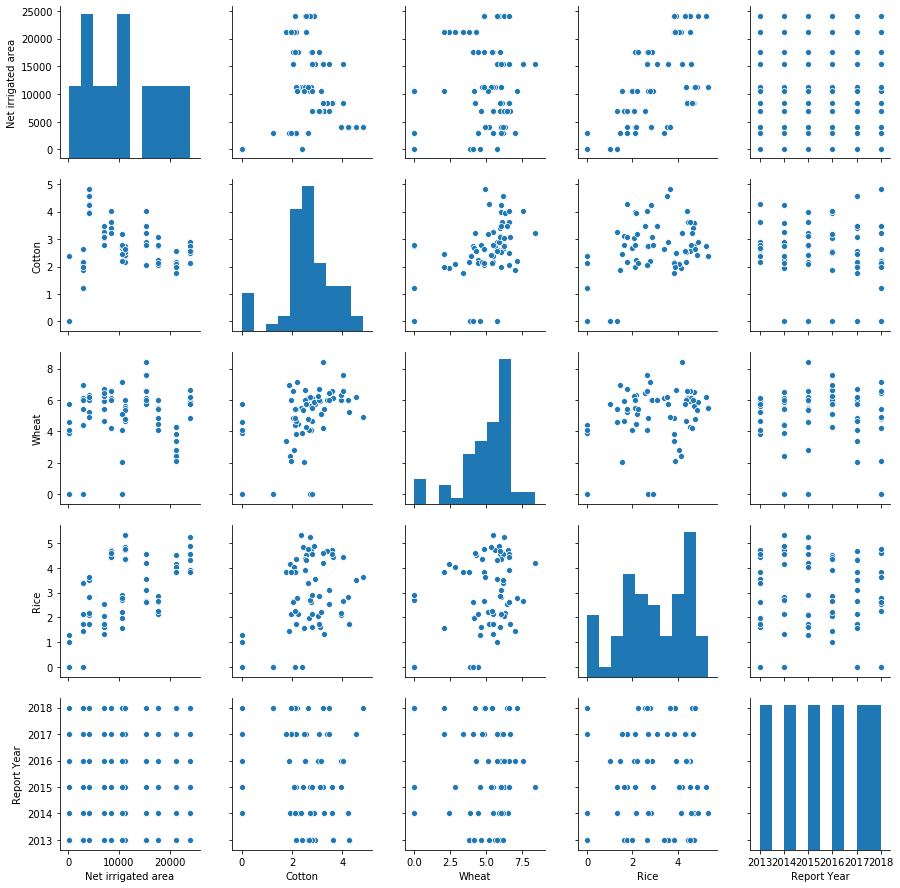

In [87]:
sns.pairplot(df_cropy_total)

In [107]:
# Export dataframe into csv file
# df_cropy_total.to_csv('Sogd_Crop_Pattern\Sogd_Province_cropYield_Total.csv', index=True, header=True)
df_cropy_total = pd.read_csv('Sogd_Crop_Pattern\Sogd_Province_cropYield_Total.csv')

In [108]:
# Changing data types for data in columns
df_cropy_total=df_cropy_total.astype({'Net irrigated area':'float','Cotton':'float','Wheat':'float','Rice':'float'})

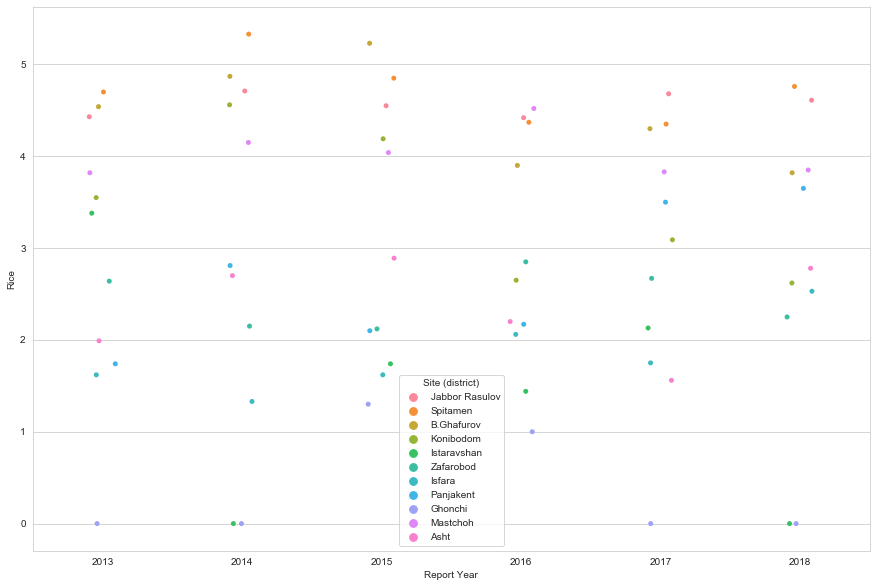

In [115]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Report Year', y='Rice', hue='Site (district)', data=df_cropy_total)

In [109]:
df_cropy_total.head()

,Unnamed: 0,Site (district),Net irrigated area,Cotton,Wheat,Rice,Report Year,Province,Area Units,Yield Units
0,0,Jabbor Rasulov,8360.9,3.63,6.11,4.43,2013,Sogd,ha,t/ha
1,1,Spitamen,11237.5,2.74,5.63,4.70,2013,Sogd,ha,t/ha
2,2,B.Ghafurov,24025.1,2.61,5.96,4.54,2013,Sogd,ha,t/ha
3,3,Konibodom,15327.7,2.91,5.76,3.55,2013,Sogd,ha,t/ha
4,4,Istaravshan,2907.5,2.65,6.14,3.38,2013,Sogd,ha,t/ha


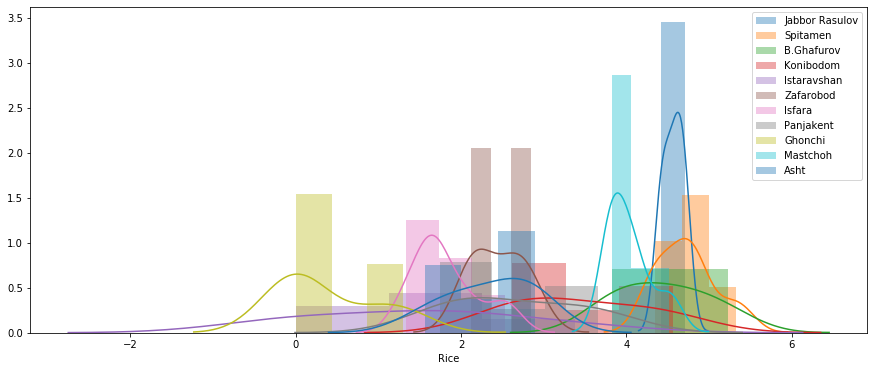

In [42]:
# Ploting distribution of rice production by each district through years
plt.figure(figsize=(15,6))
report_crop = 'Rice'

for i in df_cropy_total['Site (district)'].unique():
    sns.distplot(df_cropy_total[df_cropy_total['Site (district)']==i][report_crop], bins=3)

plt.legend(df_cropy_total['Site (district)'].unique())

In [39]:
df_cropy_total.groupby(['Site (district)']).get_group('Konibodom')

,Unnamed: 0,Site (district),Net irrigated area,Cotton,Wheat,Rice,Report Year,Province,Area Units,Yield Units
3,3,Konibodom,15327.7,2.91,5.76,3.55,2013,Sogd,ha,t/ha
13,13,Konibodom,15327.7,2.80,6.15,4.56,2014,Sogd,ha,t/ha
24,24,Konibodom,15327.7,3.23,8.42,4.19,2015,Sogd,ha,t/ha
39,39,Konibodom,15327.7,4.04,7.58,2.65,2016,Sogd,ha,t/ha
48,48,Konibodom,15327.7,3.49,5.99,3.09,2017,Sogd,ha,t/ha
58,58,Konibodom,15327.7,2.06,6.57,2.62,2018,Sogd,ha,t/ha


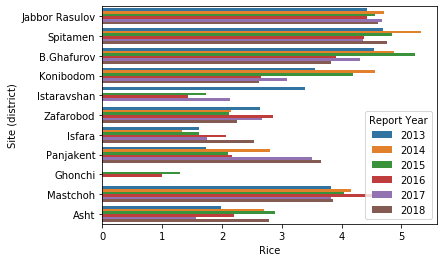

In [36]:
sns.barplot(x='Rice',y='Site (district)', hue='Report Year', data=df_cropy_total)

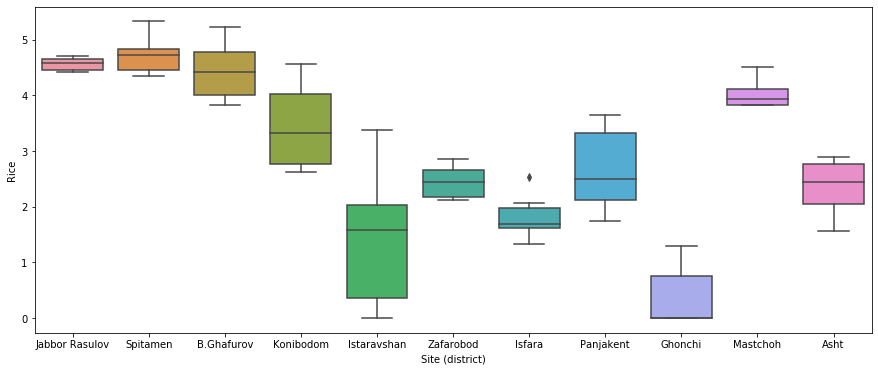

In [165]:
# Ploting boxplot of rice production by each district through years
plt.figure(figsize=(15,6))
sns.boxplot(x='Site (district)', y='Rice', data=df_cropy_total)

<Figure size 1080x432 with 0 Axes>

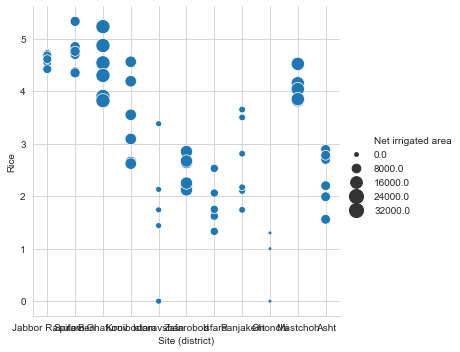

In [120]:
# Ploting relplot of rice production by each district through years
plt.figure(figsize=(15,6))
sns.relplot(x='Site (district)', y='Rice', size='Net irrigated area', data=df_cropy_total, sizes=(15, 200))

<Figure size 1080x432 with 0 Axes>

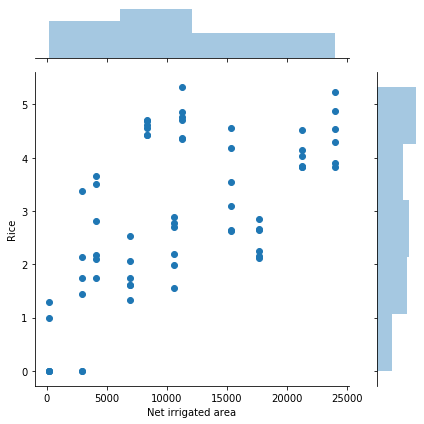

In [174]:
# Ploting jointplot of rice production by each district through years
plt.figure(figsize=(15,6))
sns.jointplot(x='Net irrigated area', y='Rice', data=df_cropy_total)
plt.tight_layout()

In [11]:
# Year max-Year September = consumption
vol_sept=df_vol[df_vol['Month']==9].groupby(['Year']).mean().iloc[5:11]

In [ ]:
# Ploting jointplot of rice production by each district through years
plt.figure(figsize=(15,6))
sns.jointplot(x='Net irrigated area', y='Rice', data=df_cropy_total)
plt.tight_layout()

In [93]:
rice_jbras = df_cropy_total[df_cropy_total['Site (district)']=='Jabbor Rasulov'][['Site (district)','Rice','Report Year']]

In [94]:
rice_jbras=rice_jbras.set_index(['Report Year'])

In [95]:
vol_rice_jbras_sept = pd.concat([rice_jbras, vol_sept], axis=1)

In [96]:
vol_rice_jbras_sept

,Site (district),Rice,Value,Month
2013,Jabbor Rasulov,4.43,1.805500,9
2014,Jabbor Rasulov,4.71,1.031667,9
2015,Jabbor Rasulov,4.55,1.827000,9
2016,Jabbor Rasulov,4.42,1.627000,9
2017,Jabbor Rasulov,4.68,2.759000,9
2018,Jabbor Rasulov,4.61,2.319800,9


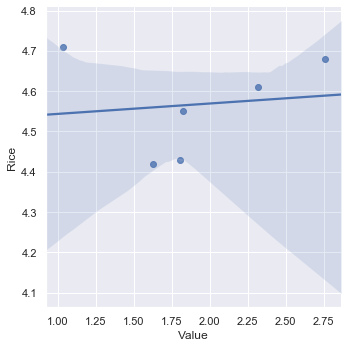

In [101]:
# Checking scatterplot of rice yield in Jabbor Rasulov district against lake volume in September per year
sns.set(style='darkgrid')
sns.lmplot(x='Value', y='Rice', data=vol_rice_jbras_sept)

In [122]:
rice_konib = df_cropy_total[df_cropy_total['Site (district)']=='Konibodom'][['Site (district)','Rice','Report Year']]
rice_konib=rice_konib.set_index(['Report Year'])
vol_rice_konib_sept = pd.concat([rice_konib, vol_sept], axis=1)

NameError: name 'vol_sept' is not defined

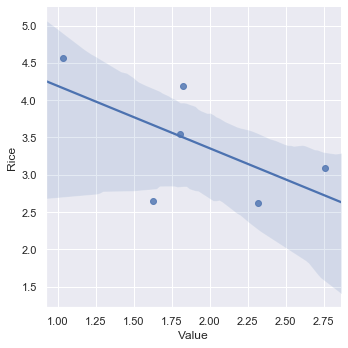

In [13]:
# Checking scatterplot of rice yield in Konibodom district against lake volume in September per year
sns.set(style='darkgrid')
sns.lmplot(x='Value', y='Rice', data=vol_rice_konib_sept)

In [15]:
rice_ghaf= df_cropy_total[df_cropy_total['Site (district)']=='B.Ghafurov'][['Site (district)','Rice','Report Year']]
rice_ghaf=rice_ghaf.set_index(['Report Year'])
vol_rice_ghaf_sept = pd.concat([rice_ghaf, vol_sept], axis=1)

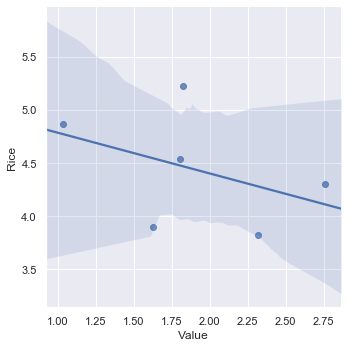

In [17]:
# Checking scatterplot of rice yield in B.Ghafurov district against lake volume in September per year
sns.set(style='darkgrid')
sns.lmplot(x='Value', y='Rice', data=vol_rice_ghaf_sept)